In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")

In [3]:
customer_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
customer_data.shape

(1465, 16)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
customer_data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
customer_data = customer_data.dropna()

In [8]:
customer_data.shape

(1463, 16)

In [9]:
customer_data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [10]:
def clean_values(value):
    # Split the value by comma and return the first part (User ID or User Name)
    return value.split(',')[0].strip()  # Change the index to [1] for User Name if needed

# Apply the function to clean up each column
customer_data['user_id'] = customer_data['user_id'].apply(clean_values)
customer_data['user_name'] = customer_data['user_name'].apply(clean_values)
customer_data['review_id'] = customer_data['review_id'].apply(clean_values)
customer_data['review_title'] = customer_data['review_title'].apply(clean_values)

In [11]:
customer_data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [12]:
customer_segmentation_df = customer_data[['discounted_price',
       'actual_price', 'discount_percentage']]

In [13]:
customer_segmentation_df.head()

,discounted_price,actual_price,discount_percentage
0,₹399,"₹1,099",64%
1,₹199,₹349,43%
2,₹199,"₹1,899",90%
3,₹329,₹699,53%
4,₹154,₹399,61%


In [16]:
customer_segmentation_df.head()

,discounted_price,actual_price,discount_percentage
0,₹399,"₹1,099",64%
1,₹199,₹349,43%
2,₹199,"₹1,899",90%
3,₹329,₹699,53%
4,₹154,₹399,61%


In [18]:
customer_segmentation_df.isna().sum()

discounted_price       0
actual_price           0
discount_percentage    0
dtype: int64

In [19]:
customer_segmentation_df.sample(3)

,discounted_price,actual_price,discount_percentage
927,₹397,₹899,56%
374,₹139,₹495,72%
798,₹69,₹299,77%


In [20]:
customer_segmentation_df['actual_price'] = customer_segmentation_df['actual_price'].str.replace("₹",'')

/tmp/ipykernel_36/3189962881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation_df['actual_price'] = customer_segmentation_df['actual_price'].str.replace("₹",'')


In [21]:
customer_segmentation_df['discounted_price'] = customer_segmentation_df['discounted_price'].str.replace("₹",'')

/tmp/ipykernel_36/1712547823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation_df['discounted_price'] = customer_segmentation_df['discounted_price'].str.replace("₹",'')


In [22]:
customer_segmentation_df['actual_price'] = customer_segmentation_df['actual_price'].str.replace(",",'')

/tmp/ipykernel_36/1838096610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation_df['actual_price'] = customer_segmentation_df['actual_price'].str.replace(",",'')


In [23]:
customer_segmentation_df['discounted_price'] = customer_segmentation_df['discounted_price'].str.replace(",",'')

/tmp/ipykernel_36/3354208269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation_df['discounted_price'] = customer_segmentation_df['discounted_price'].str.replace(",",'')


In [24]:
customer_segmentation_df['discount_percentage'] = customer_segmentation_df['discount_percentage'].str.replace('%', '').astype(float)

/tmp/ipykernel_36/1815546994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation_df['discount_percentage'] = customer_segmentation_df['discount_percentage'].str.replace('%', '').astype(float)


In [25]:
customer_segmentation_df.sample(3)

,discounted_price,actual_price,discount_percentage
499,16999,20999,19.0
439,7499,7999,6.0
1234,14499,23559,38.0


In [53]:
customer_segmentation_df.columns

Index(['discounted_price', 'actual_price', 'discount_percentage'], dtype='object')

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardizing the data (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_segmentation_df)

# Applying PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the 2 principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Display the resulting DataFrame with the 2 principal components
print(pca_df.head())


        PC1       PC2
0 -0.726850  0.594705
1 -0.558979 -0.363043
2 -0.987414  1.770957
3 -0.635891  0.093394
4 -0.761468  0.441712


In [29]:
from sklearn.cluster import KMeans

# List to store WCSS values
wcss = []

# Loop over different number of clusters
for i in range(1, 11):
    # Set n_init to 10 to suppress the warning
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    
    # Fit the KMeans model
    kmeans.fit(pca_df)
    
    # Append the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# WCSS values now calculated without warnings
print(wcss)

[4345.368494169108, 2321.601356226811, 1368.8509124003185, 924.0172917019667, 698.6107205837905, 555.7509579621224, 467.3938417083558, 401.75165088297047, 346.1261883919181, 306.23797712471287]


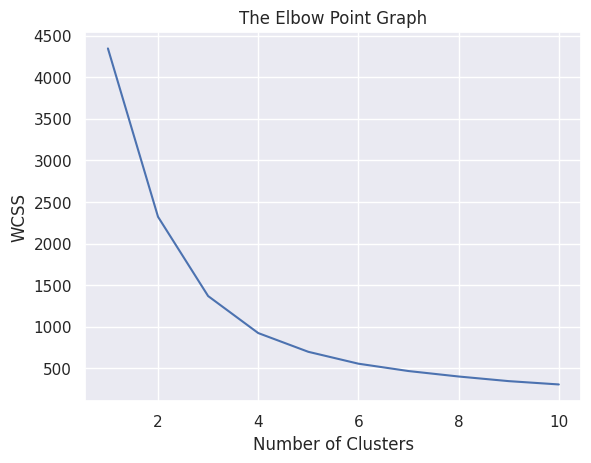

In [30]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
from sklearn.cluster import KMeans

# Set n_init explicitly to 10 to suppress the warning
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10)

# Return a label for each data point based on their cluster
clusters = kmeans.fit_predict(customer_segmentation_df)

# Print the cluster labels
print(clusters)

[0 0 0 ... 0 0 0]


In [47]:
unique_labels = np.unique(clusters)
print(unique_labels)

[0 1 2]


In [50]:
X = customer_segmentation_df.iloc[:].values

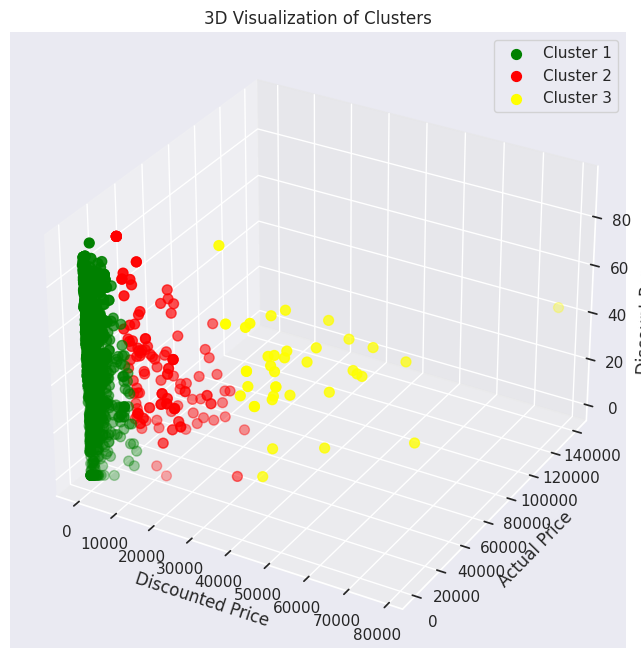

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Converting the first two columns (which are strings) to float for plotting
X = X.astype(float)

# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
ax.scatter(X[clusters == 0, 0], X[clusters == 0, 1], X[clusters == 0, 2], s=50, c='green', label='Cluster 1')
ax.scatter(X[clusters == 1, 0], X[clusters == 1, 1], X[clusters == 1, 2], s=50, c='red', label='Cluster 2')
ax.scatter(X[clusters == 2, 0], X[clusters == 2, 1], X[clusters == 2, 2], s=50, c='yellow', label='Cluster 3')

# Labeling the axes
ax.set_xlabel('Discounted Price')
ax.set_ylabel('Actual Price')
ax.set_zlabel('Discount Percentage')

# Adding a title and legend
ax.set_title('3D Visualization of Clusters')
ax.legend()

# Show plot
plt.show()

In [55]:
import plotly.graph_objs as go
import numpy as np

# Converting the first two columns (which are strings) to float for plotting
X = X.astype(float)

# Create traces for each cluster
trace0 = go.Scatter3d(
    x=X[clusters == 0, 0],
    y=X[clusters == 0, 1],
    z=X[clusters == 0, 2],
    mode='markers',
    marker=dict(size=8, color='green'),
    name='Cluster 1'
)

trace1 = go.Scatter3d(
    x=X[clusters == 1, 0],
    y=X[clusters == 1, 1],
    z=X[clusters == 1, 2],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='Cluster 2'
)

trace2 = go.Scatter3d(
    x=X[clusters == 2, 0],
    y=X[clusters == 2, 1],
    z=X[clusters == 2, 2],
    mode='markers',
    marker=dict(size=8, color='yellow'),
    name='Cluster 3'
)

# Combine traces
data = [trace0, trace1, trace2]

# Define layout
layout = go.Layout(
    title='3D Cluster Visualization',
    scene=dict(
        xaxis_title='Discounted Price',
        yaxis_title='Actual Price',
        zaxis_title='Discount Percentage'
    )
)

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)
fig.show()